In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
import random
import sklearn
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, boxcox, boxcox_normmax
from scipy.special import boxcox1p
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import sklearn.model_selection as xval
from sklearn.datasets.mldata import fetch_mldata
import forestci as fci
from xgboost import XGBRegressor


Failed to import duecredit due to No module named 'duecredit'


In [2]:
df_train = pd.read_csv("C:\\Users\\zjh41\\Desktop\\stat 654\\final project\\train.csv",index_col='Id')
df_train1 = pd.read_csv("C:\\Users\\zjh41\\Desktop\\stat 654\\final project\\train.csv",index_col='Id')
df_test =  pd.read_csv("C:\\Users\\zjh41\\Desktop\\stat 654\\final project\\test.csv",index_col='Id')
df_all = pd.concat([df_train,df_test])
print ("Num of rows: " + str(df_all.shape[0])) # row count
print ("Num of columns: " + str(df_all.shape[1])) # col count

Num of rows: 2919
Num of columns: 80


# Explortary Data Analysis

### Analysis of SalePrice

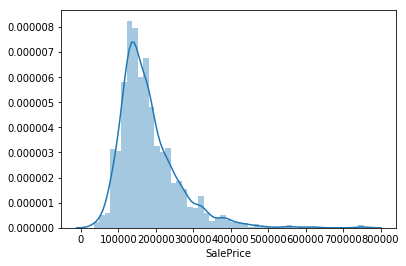

In [3]:
sns.distplot(df_train['SalePrice'])

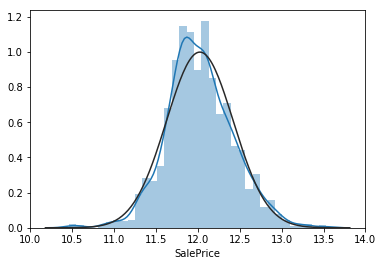

In [4]:
sns.distplot(np.log1p(df_train['SalePrice']), fit=norm)

In [5]:
df_train.info(verbose=True, null_counts=True)
df_train.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [6]:
def missingInfo(data):
    missing = [(c, data[c].isna().mean()*100) for c in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > 0].sort_values("percentage", ascending=False)
    return missing
missing = missingInfo(df_train)
missing

,column_name,percentage
71,PoolQC,99.520548
73,MiscFeature,96.301370
5,Alley,93.767123
72,Fence,80.753425
56,FireplaceQu,47.260274
2,LotFrontage,17.739726
57,GarageType,5.547945
58,GarageYrBlt,5.547945
59,GarageFinish,5.547945
62,GarageQual,5.547945


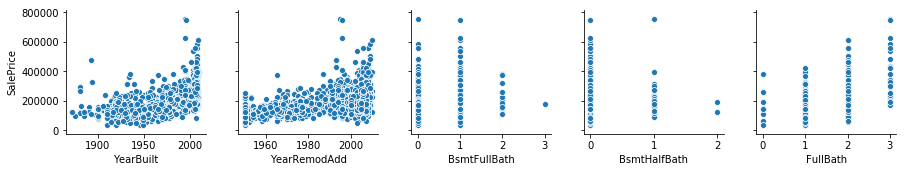

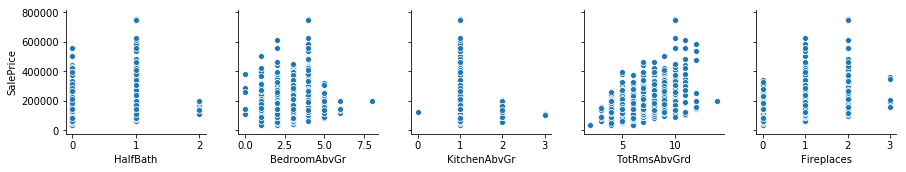

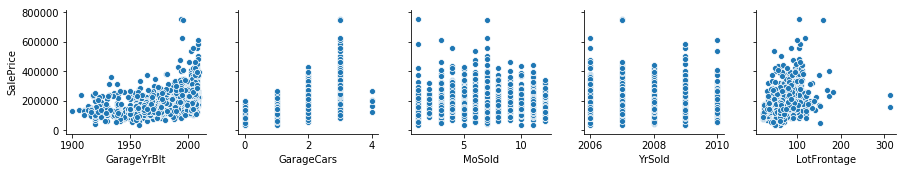

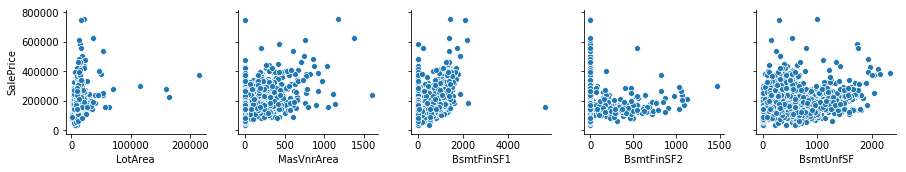

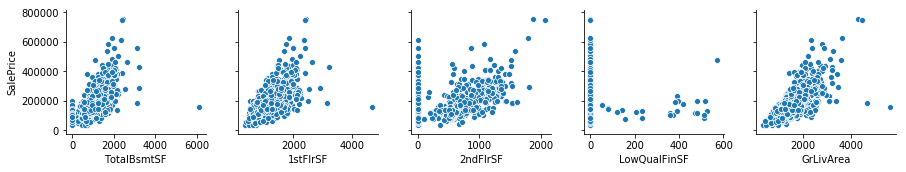

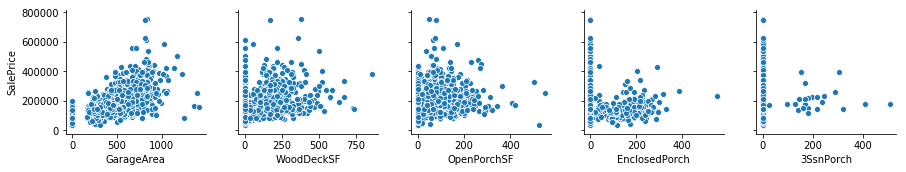

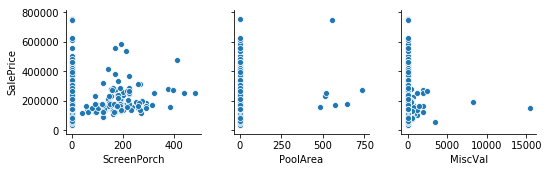

In [7]:
# 14 discrete
discrete = ["YearBuilt", "YearRemodAdd", "BsmtFullBath", "BsmtHalfBath", 
            "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr",
            "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", 
            "MoSold", "YrSold"]
# 20 continuous
continuous = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
              "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
              "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
              "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
              "ScreenPorch", "PoolArea", "MiscVal", "SalePrice"]
def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]
cols = discrete + continuous
cols.remove('SalePrice')
data = pd.concat([df_all['SalePrice'], df_all[cols]], axis=1)
for lst in chunks(cols, 5):
    sns.pairplot(data, y_vars=['SalePrice'], x_vars=lst)

# Feature Engineering

### Delete outliers

In [8]:
outliers = {"LotArea": 100000, "BsmtFinSF1": 4000, "TotalBsmtSF": 6000, 
            "1stFlrSF": 4000, "GrLivArea": 4000, "MiscVal": 5000}
def clean_outliers(df, outliers):
    for col in outliers:
        df = df[df[col] < outliers[col]]
    return df


df_train = clean_outliers(df_train, outliers)
print("Before cleaning: %d" % len(df_train))
print("After cleaning: %d" % len(df_train))


Before cleaning: 1450
After cleaning: 1450


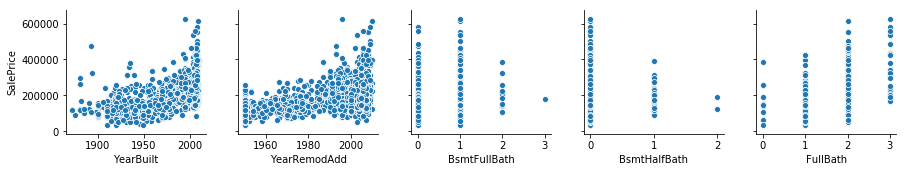

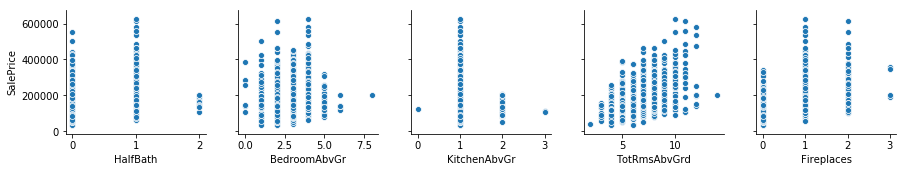

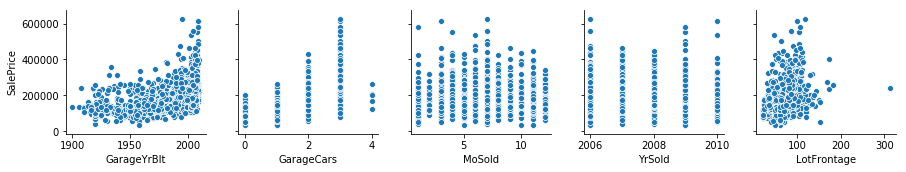

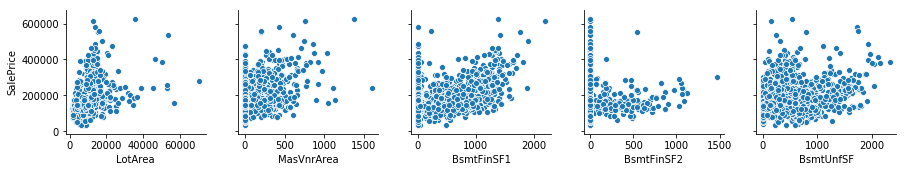

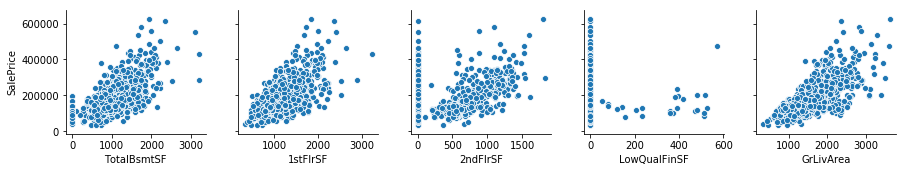

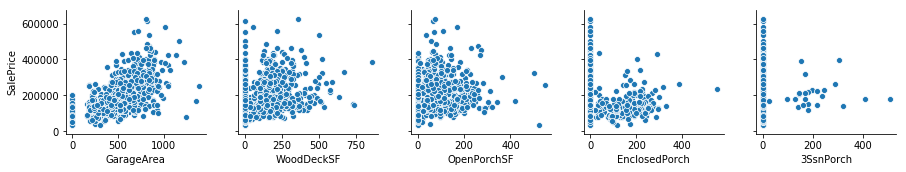

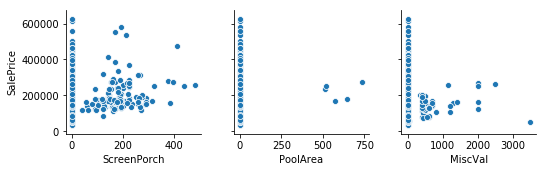

In [9]:

def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]
cols = discrete + continuous
cols.remove('SalePrice')
data = pd.concat([df_train['SalePrice'], df_train[cols]], axis=1)
for lst in chunks(cols, 5):
    sns.pairplot(data, y_vars=['SalePrice'], x_vars=lst)

### Drop variable missing rate > 40%

In [10]:
drops = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
df_train = df_train.drop(drops, axis=1)
df_test = df_test.drop(drops, axis=1)

### Label Encoding & Value-Mapping

In [11]:
categorical = ["MSZoning", "Street", "LotShape", "LandContour", 
               "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
               "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
               "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
               "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
               "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
               "KitchenQual", "Functional",  "GarageType", "GarageFinish",
               "GarageQual", "GarageCond", "PavedDrive", 
               "SaleType", "SaleCondition"]
icategorical = ["MSSubClass", "OverallQual", "OverallCond"]

qual_dict = {"NONE": 0, "Po": 1, "Fa": 2, "TA": 4, "Gd": 7, "Ex": 11}
qual_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", 
             "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

def discretize(df, cols):
    for col in cols:
        df[col] = df[col].fillna("NONE")
        if col in qual_cols:
            df[col] = df[col].map(qual_dict).astype('int')
        else:
            df[col] = df[col].astype('category')
    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

dataset = pd.concat(objs=[df_train, df_test], axis=0)
discretize(dataset, categorical)
idx = len(df_train)
df_train = dataset[:idx]
df_test = dataset[idx:]

### Drop high correlation variales

In [12]:
#Numerical Variables

In [13]:
def get_numeric(dataset,numeric):
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in dataset.columns:
        if dataset[i].dtype in numeric_dtypes:
            if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
                pass
            else:
                numeric.append(i)     
    return numeric
numeric = get_numeric(df_train,[])

In [14]:
corr = df_train.corr()
cols = numeric
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        attr1 = cols[i];
        attr2 = cols[j];
        if corr[attr1][attr2] > 0.7:
            print("(%s, %s): %.2f" % (attr1, attr2, corr[attr1][attr2]))

(1stFlrSF, TotalBsmtSF): 0.80
(ExterQual, KitchenQual): 0.71
(ExterQual, OverallQual): 0.72
(ExterQual, SalePrice): 0.71
(GarageArea, GarageCars): 0.89
(GarageCond, GarageQual): 0.90
(GarageYrBlt, YearBuilt): 0.83
(GrLivArea, SalePrice): 0.72
(GrLivArea, TotRmsAbvGrd): 0.83
(OverallQual, SalePrice): 0.80


## Box plot

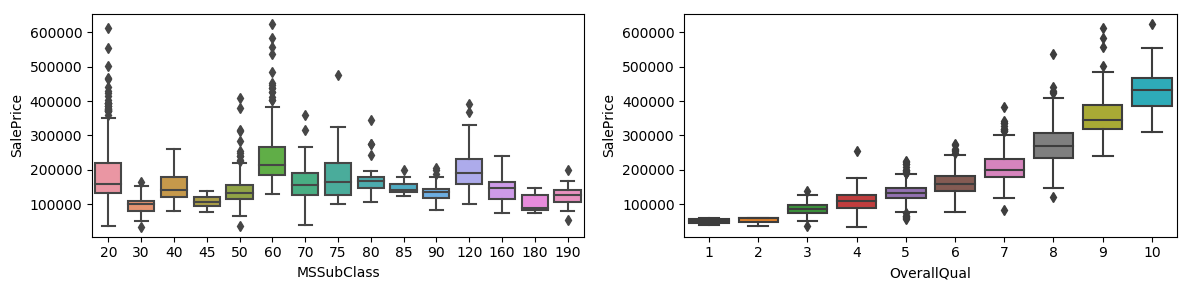

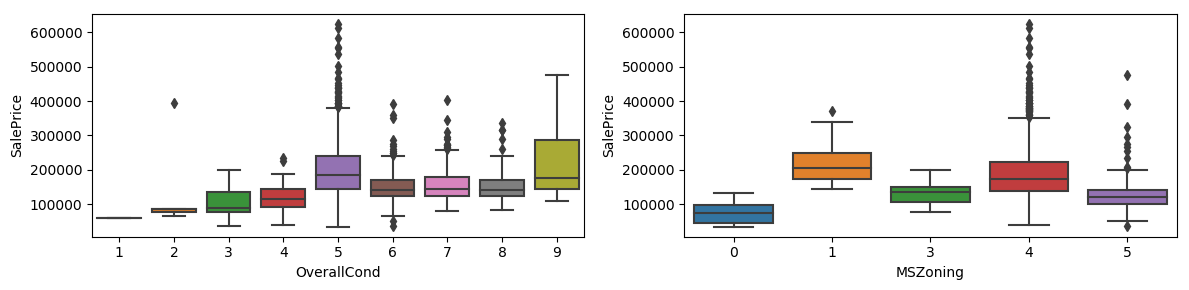

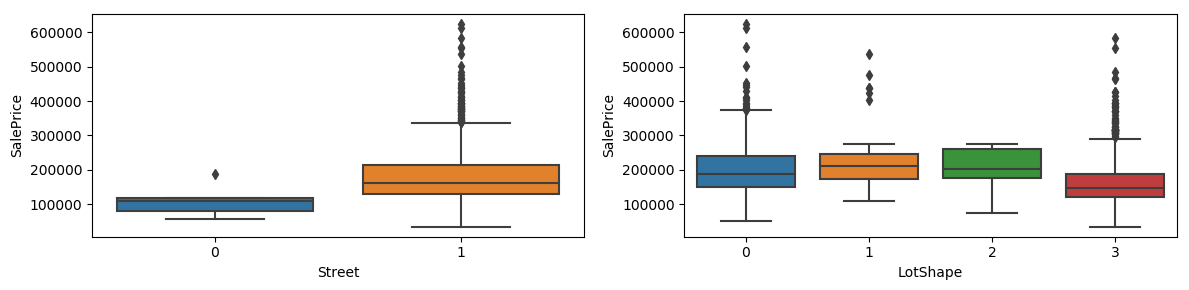

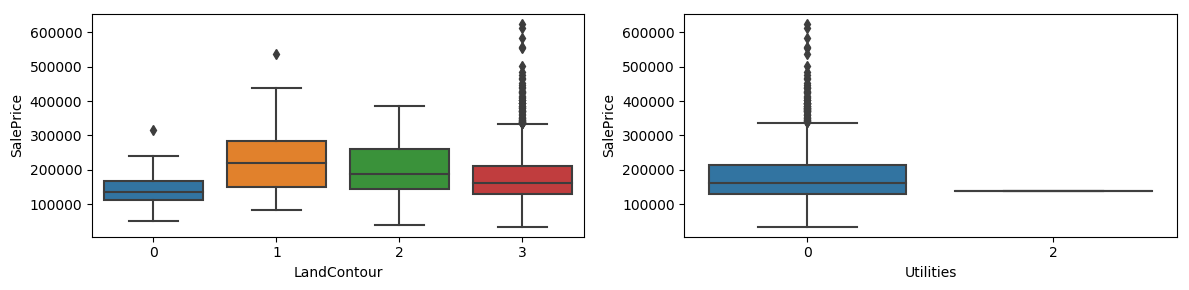

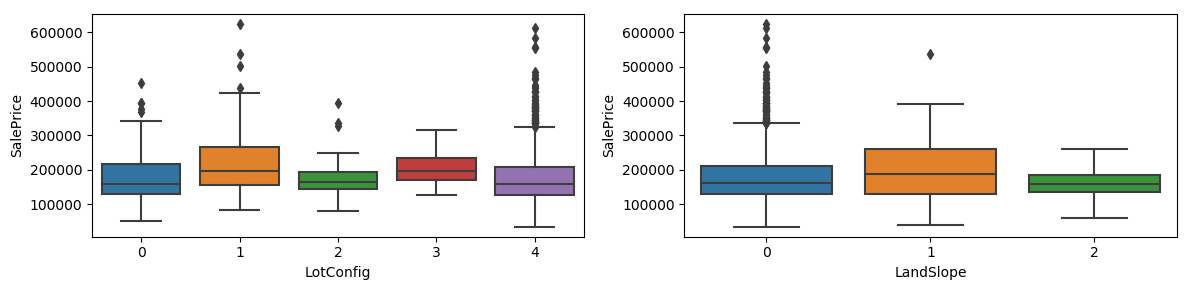

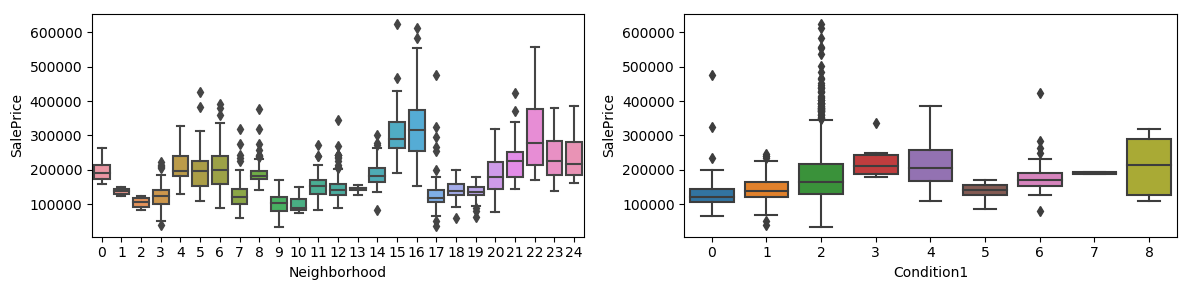

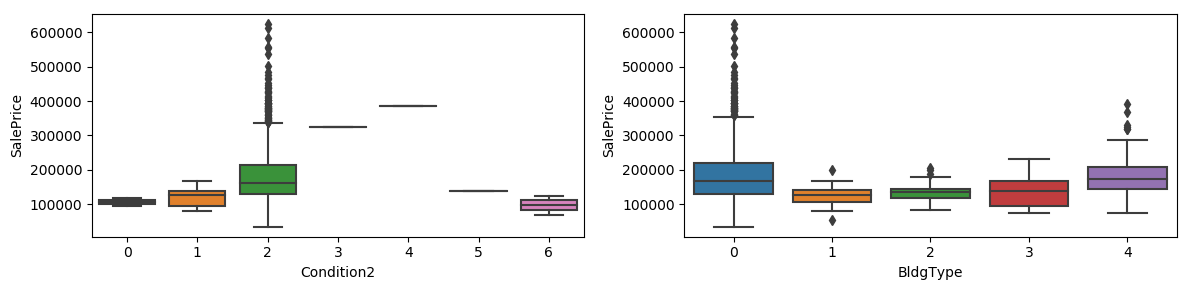

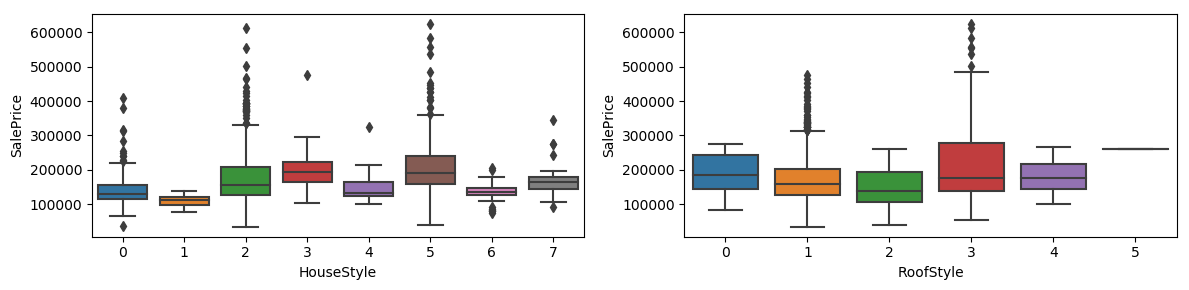

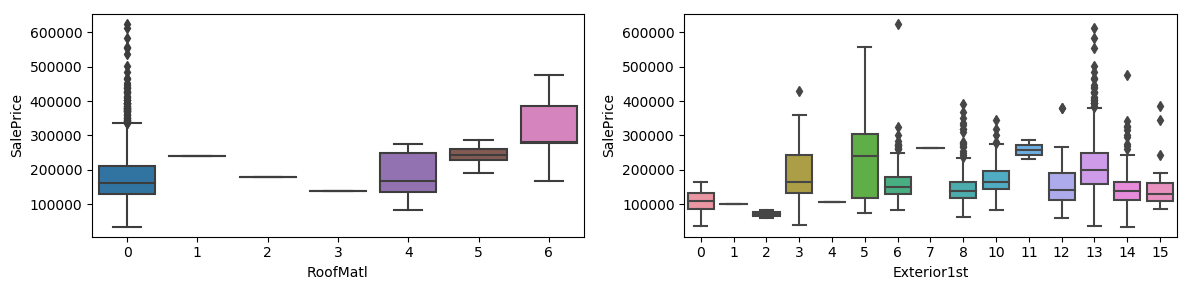

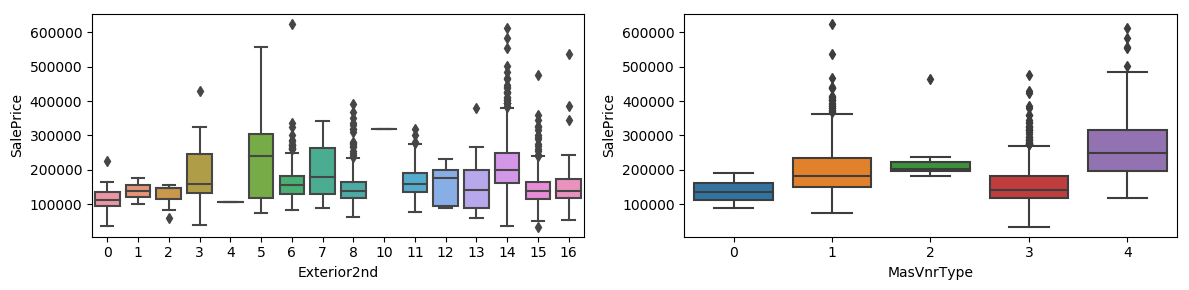

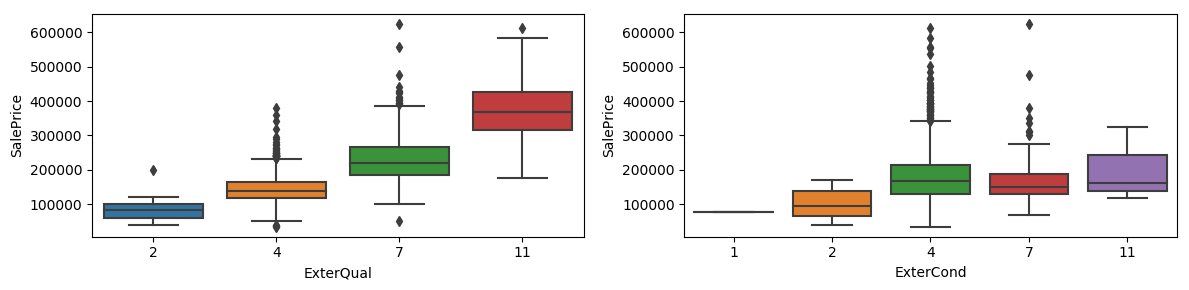

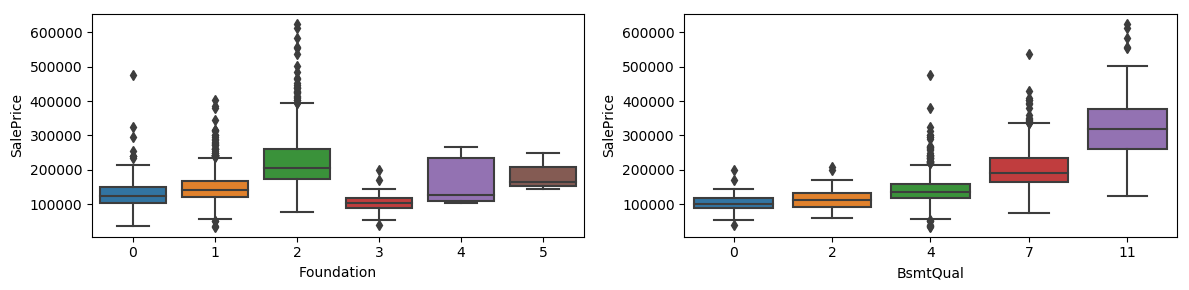

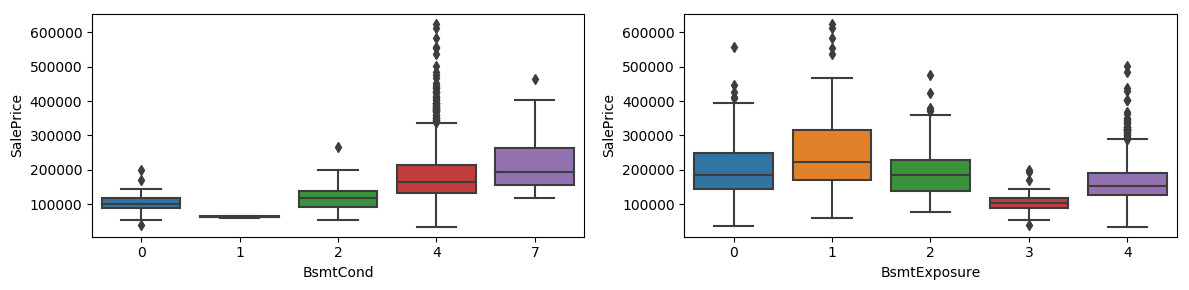

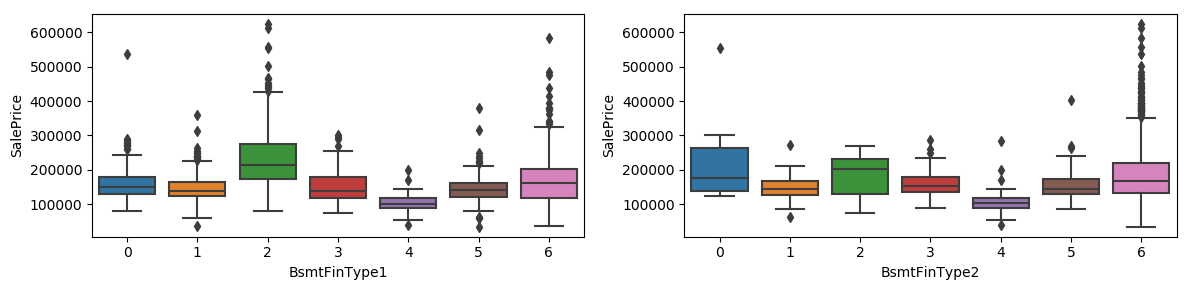

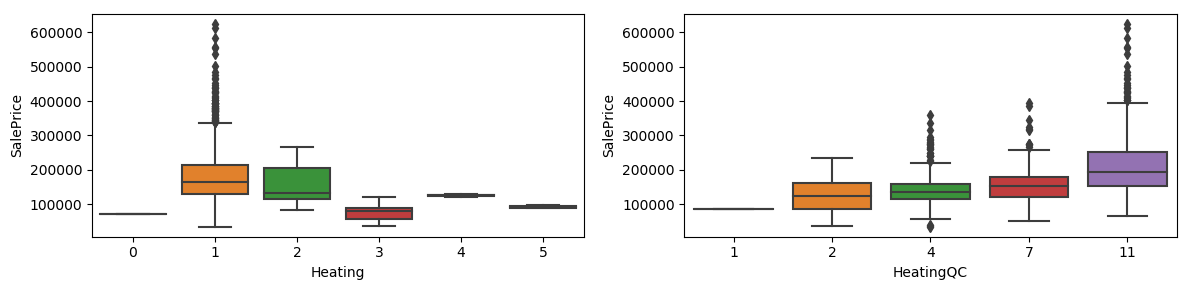

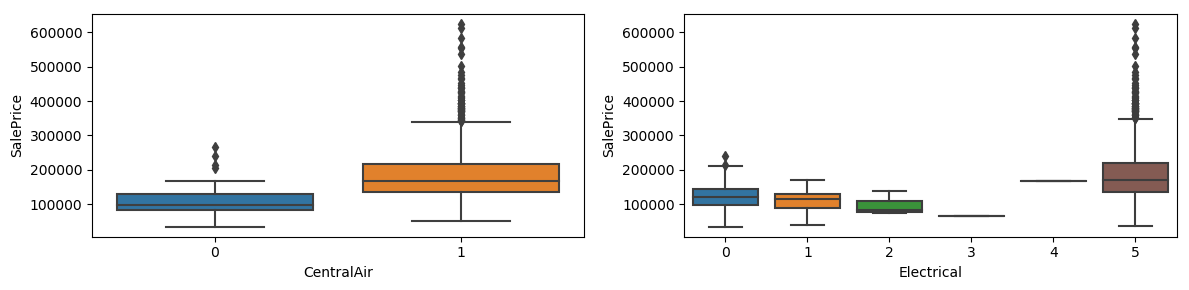

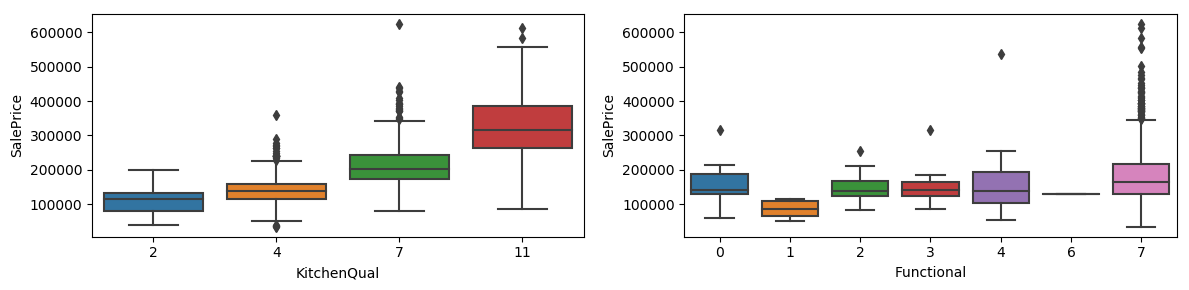

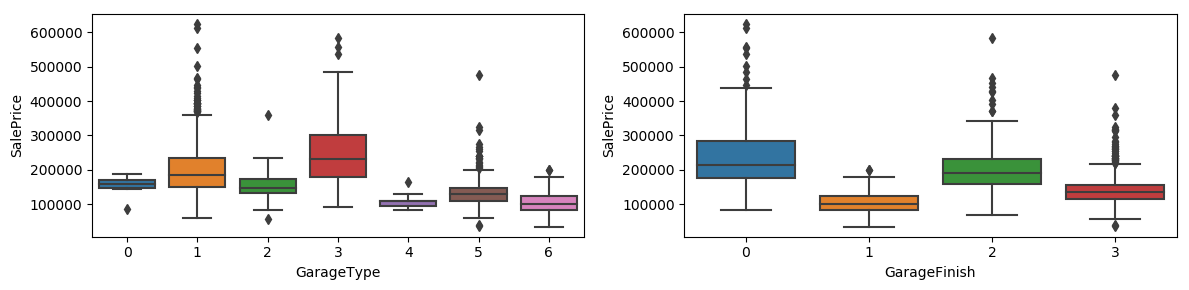

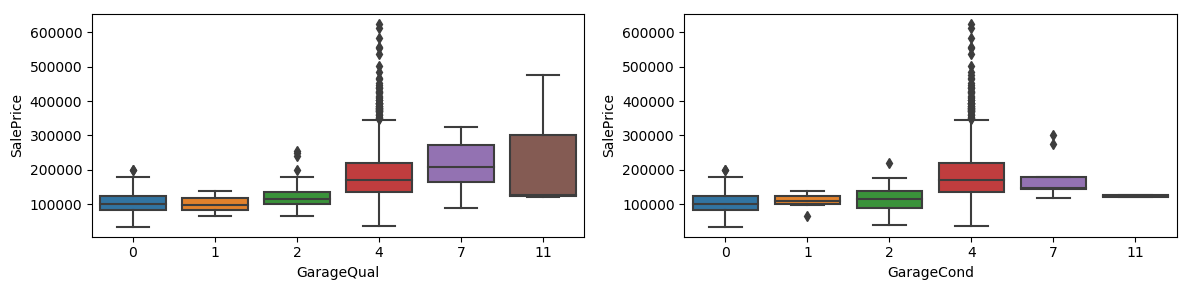

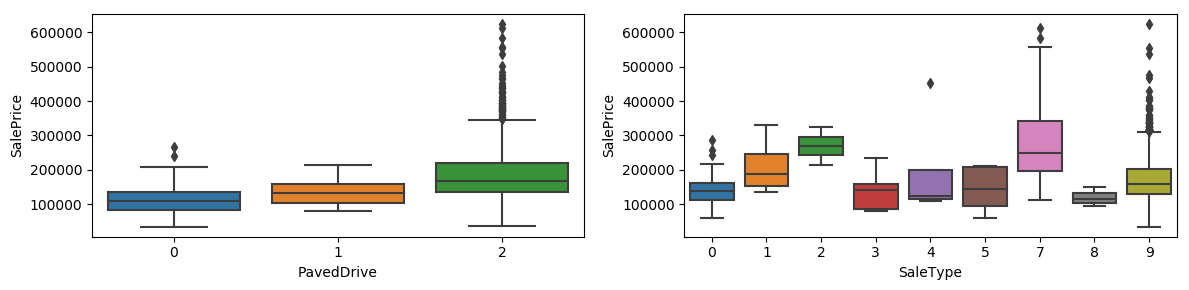

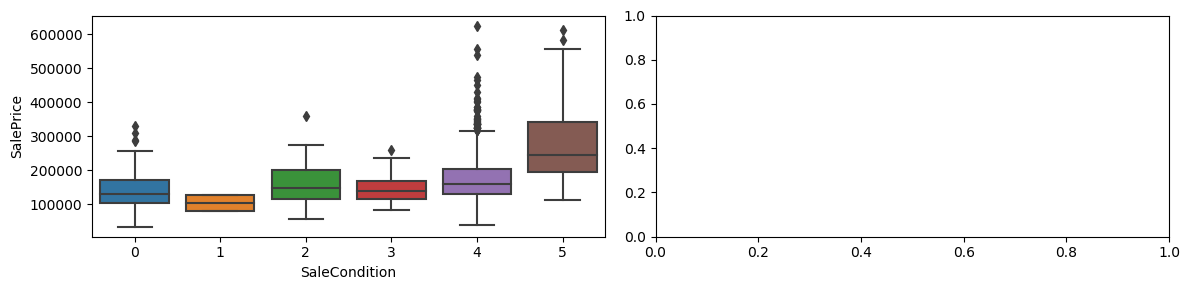

In [15]:
def boxplot(df, cols, ncols):
    for lst in chunks(cols, ncols):
        fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(12, 3), dpi=100)
        for idx in range(0, len(lst)):
            attr = lst[idx]
            data = pd.concat([df['SalePrice'], df[attr]], axis=1)
            sns.boxplot(x=attr, y='SalePrice', data=data, ax=axes[idx])
        plt.tight_layout()

boxplot(df_train, icategorical + categorical, 2)

In [17]:
drops = ["GarageCars", "GarageQual", "TotRmsAbvGrd", "1stFlrSF", "KitchenQual", 
         "Exterior2nd", "GarageYrBlt", "ExterQual", "BldgType", "MiscVal","PoolArea",
         "ScreenPorch","3SsnPorch","EnclosedPorch","LowQualFinSF","BsmtFinSF2","KitchenAbvGr","BsmtHalfBath" ]
df_train = df_train.drop(drops, axis=1)
df_test = df_test.drop(drops, axis=1)

### Impute missing value

In [18]:
missingInfo(df_train)

,column_name,percentage
33,LotFrontage,17.517241
37,MasVnrArea,0.551724


In [19]:
missingInfo(df_test)

,column_name,percentage
48,SalePrice,100.000000
33,LotFrontage,15.558602
37,MasVnrArea,1.028101
7,BsmtFullBath,0.137080
4,BsmtFinSF1,0.068540
9,BsmtUnfSF,0.068540
20,GarageArea,0.068540
51,TotalBsmtSF,0.068540


In [20]:
# df_train["LotAreaChop"] = pd.qcut(df_train.LotArea,10)
# df_train.groupby(['LotAreaChop'])[['LotFrontage']].agg(['mean','median','count'])
# df_train = df_train.drop(['LotAreaChop'],axis =1 )

In [21]:
def impute(df):
    cols=["MasVnrArea"]
    for col in cols:
        df[col].fillna(0, inplace=True)
    return df

def impute_LF(df_all):
    df_all['LotAreaChop'] = pd.qcut(df_all['LotArea'],10)
    df_all['LotFrontage']=df_all.groupby(['LotAreaChop'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    df_all = df_all.drop(['LotAreaChop'],axis =1 )
    return df_all

df_train  = impute(df_train)
df_test = impute(df_test)
df_train = impute_LF(df_train)
df_test = impute_LF(df_test)
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(0)
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)

# Add seasonal trends based on ‘Mosold’ 

In [22]:
df_train['Season'] = 0
df_test['Season'] = 0

In [23]:
def add_season(df):
    df.loc[(df['MoSold']<=3), 'Season'] = 1
    df.loc[(df['MoSold']<=6) & (df['MoSold'] >3), 'Season'] = 2
    df.loc[(df['MoSold']<=9) & (df['MoSold'] >6), 'Season'] = 3
    df.loc[(df['MoSold']<=12) &  (df['MoSold'] >9), 'Season'] = 4

add_season(df_train)
add_season(df_test)

### Boxcox Transformation for highly skewed numerical feature

In [24]:
def get_numeric(dataset,numeric):
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in dataset.columns:
        if dataset[i].dtype in numeric_dtypes:
            if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace','SalePrice']:
                pass
            else:
                numeric.append(i)     
    return numeric

In [25]:
numeric_feats = get_numeric(df_train,[])

In [26]:
num_cols = numeric_feats 
skew_feat= pd.DataFrame(df_train[num_cols].skew().sort_values(ascending = False),columns = ['skewness'])
skew_feat

,skewness
LotArea,3.966392
MasVnrArea,2.667908
ExterCond,2.354097
OpenPorchSF,2.337466
WoodDeckSF,1.528562
MSSubClass,1.404018
LotFrontage,1.338663
BsmtUnfSF,0.919729
GrLivArea,0.842172
2ndFlrSF,0.776514


In [27]:
def boxcox_num(df,num_cols):
    #Boxcox transformation for all skewed feature
    skew_feat= pd.DataFrame(df[num_cols].skew().sort_values(ascending = False),columns = ['skewness'])
    skew_feat[skew_feat['skewness'] > 0.5]
    print(df[skew_feat.index].skew().sort_values(ascending = False))
    lmabda = {}
    for feat in skew_feat.index:
        # +1 for negative value
        df[feat], lmabda[feat] = boxcox((df[feat]+1))
    return df,lmabda

df_train,  lmabda= boxcox_num(df_train,num_cols)
df_test,  lmabda= boxcox_num(df_test,num_cols)

LotArea         3.966392
MasVnrArea      2.667908
ExterCond       2.354097
OpenPorchSF     2.337466
WoodDeckSF      1.528562
MSSubClass      1.404018
LotFrontage     1.338663
BsmtUnfSF       0.919729
GrLivArea       0.842172
2ndFlrSF        0.776514
BsmtFinSF1      0.751577
OverallCond     0.690850
HalfBath        0.669309
Fireplaces      0.633832
BsmtFullBath    0.573822
TotalBsmtSF     0.488569
BsmtQual        0.399401
MoSold          0.217933
BedroomAbvGr    0.215974
OverallQual     0.183384
Season          0.175176
GarageArea      0.134314
YrSold          0.090435
FullBath        0.022872
HeatingQC      -0.344206
YearRemodAdd   -0.500591
YearBuilt      -0.611144
BsmtCond       -0.664872
GarageCond     -2.106265
dtype: float64
LotArea         3.115217
OpenPorchSF     2.687779
MasVnrArea      2.549569
ExterCond       2.447537
WoodDeckSF      2.130760
MSSubClass      1.346690
BsmtFinSF1      1.166330
GrLivArea       1.130402
BsmtUnfSF       0.919923
2ndFlrSF        0.912883
Fireplaces

D:\python\lib\site-packages\scipy\stats\morestats.py:902: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
D:\python\lib\site-packages\scipy\optimize\optimize.py:2315: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
D:\python\lib\site-packages\scipy\optimize\optimize.py:1933: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
D:\python\lib\site-packages\scipy\optimize\optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
D:\python\lib\site-packages\scipy\optimize\optimize.py:1935: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
D:\python\lib\site-packages\scipy\stats\morestats.py:902: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))


# Machine Learning Techniches

In [28]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [29]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [30]:
df_train0 = df_train

### One Hot Encoding

In [31]:
df_train0 = pd.get_dummies(df_train0,columns = ['BsmtExposure','BsmtFinType1','BsmtFinType2','CentralAir','Condition1','Condition2',\
                                                 'Foundation','GarageFinish','GarageType','Heating','HouseStyle','LandContour',\
                                                'LandSlope','MSZoning','MasVnrType','Neighborhood','PavedDrive','RoofMatl','RoofStyle',\
                                               'SaleCondition','SaleType','Street','Utilities','Season'])

In [32]:
X = df_train0.drop('SalePrice', axis=1)
y = df_train0['SalePrice']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
df_test = scaler.fit(df_test).transform(df_test)

D:\python\lib\site-packages\sklearn\utils\extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count


### Try some models first.

In [33]:
model_names = ['Linear Regression', 'Lasso', 'Ridge','Random Forest','GBDT','ElasticNet','XgBoosting','LGBM']
model_list = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),ElasticNet(alpha=0.001,max_iter=10000)]
count = 0
scores = {}
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X, y,scoring="neg_mean_squared_error", cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(np.sqrt(-cv_score).mean()))
    scores[model_names[count]] = np.sqrt(-cv_score).mean()
    count += 1

[-3.15479521e+24 -2.06350902e+24 -2.18297154e+25 -1.42067648e+24
 -1.14837069e+25]
Model accuracy of Linear Regression is 2493115503551.2007
[-0.01330031 -0.01497537 -0.01757348 -0.01201595 -0.01363766]
Model accuracy of Lasso is 0.11933270917657908
[-0.01177227 -0.01436017 -0.01627052 -0.01243084 -0.0141347 ]
Model accuracy of Ridge is 0.11725462016259716
[-0.02441299 -0.02330321 -0.02263718 -0.01833486 -0.02392729]
Model accuracy of Random Forest is 0.14988955905110138
[-0.01291449 -0.01607739 -0.0179513  -0.01322065 -0.01529357]
Model accuracy of GBDT is 0.12261385325941061
[-0.01213854 -0.01421266 -0.01626418 -0.01163155 -0.01320384]
Model accuracy of ElasticNet is 0.11593612632267022


### Prediction Interval - RF

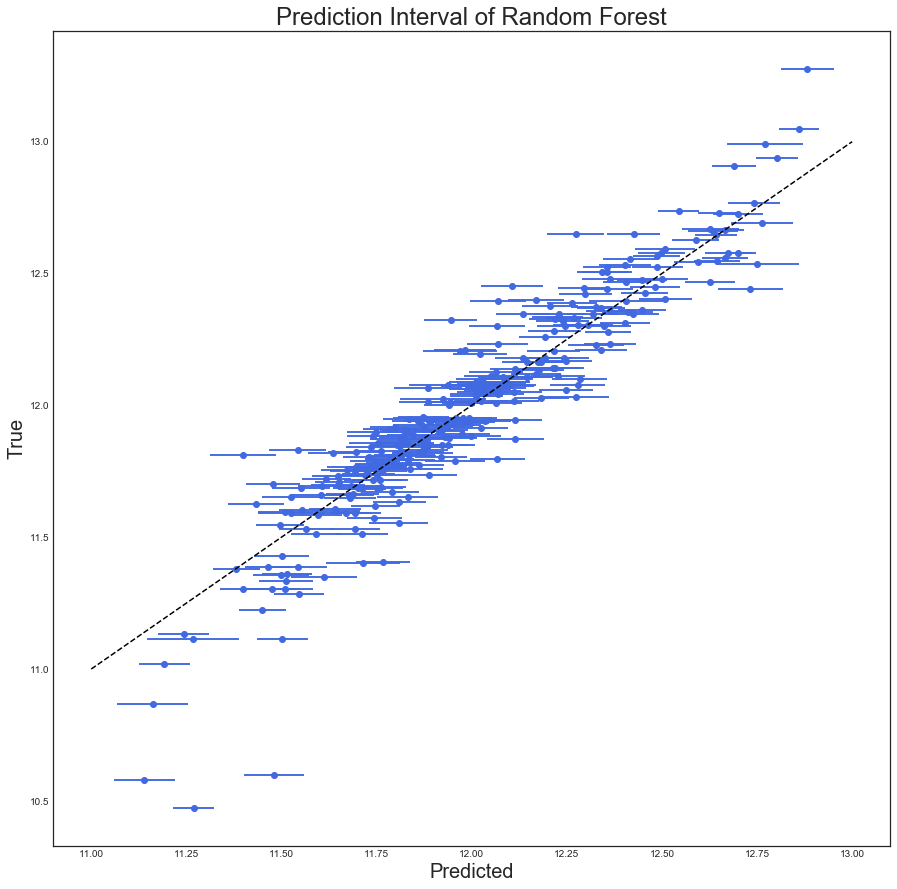

In [34]:
plt.style.use('seaborn-white')
X_train, X_test, y_train, y_test = xval.train_test_split(
                                                   X, y,
                                                   test_size=0.2,
                                                   random_state=42
                                                   )
# creat RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 2000,min_samples_leaf= 5,min_samples_split=  5)   
forest.fit(X_train, y_train)
y_hat = forest.predict(X_test)

# # Plot without error bars
# fig = plt.figure(figsize=(15, 15))
# plt.scatter(y_hat,y_test,color = 'royalblue')
# plt.plot(np.linspace(11,13,100), np.linspace(11,13,100), 'k--',linewidth=1.9,color = 'royalblue')
# plt.ylabel('True')
# plt.xlabel('Predicted')
# plt.title('Prediction of Random Forest')

# plt.savefig('C:\\Users\\zjh41\\Desktop\\stat 654\\final project\\Pred.png')
# plt.show()
# Calculate the variance:
V_unbiased = fci.random_forest_error(forest, X_train,X_test)

# Plot error bars using unbiased variance
fig = plt.figure(figsize=(15, 15))
plt.scatter(y_hat,y_test,color = 'royalblue')
plt.errorbar(y_hat,y_test, xerr=np.sqrt(V_unbiased), fmt=' ',linewidth=1.9,color = 'royalblue')
plt.plot(np.linspace(11,13,100), np.linspace(11,13,100), 'k--')
plt.ylabel('True',size = 20)
plt.xlabel('Predicted',size =20)
plt.title('Prediction Interval of Random Forest',size = 24)

plt.savefig('C:\\Users\\zjh41\\Desktop\\stat 654\\final project\\PI.png')
plt.show()

### Hyperparameters Tuning by random search 

In [35]:
pd.set_option('max_columns',1000)
pd.set_option('max_row',300)

In [36]:
class random_search():
    def __init__(self,model):
        self.model = model
    
    def random_get(self,X,y,param_random):
        random_search = RandomizedSearchCV(self.model,param_random,cv=5, scoring="neg_mean_squared_error",n_iter=300,n_jobs = -1)
        random_search.fit(X,y)
        print(random_search.best_params_, np.sqrt(-random_search.best_score_))
        random_search.cv_results_['mean_test_score'] = np.sqrt(-random_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(random_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [37]:
param_lasso = {'alpha': np.linspace(0.03,0.1,20)}
random_search(Lasso()).random_get(X,y,param_lasso)

{'alpha': 0.03} 0.14179039047107406
                            params  mean_test_score  std_test_score
0                  {'alpha': 0.03}         0.141790        0.001555
1   {'alpha': 0.03368421052631579}         0.145903        0.001624
2   {'alpha': 0.03736842105263158}         0.149586        0.001786
3   {'alpha': 0.04105263157894737}         0.153170        0.001903
4   {'alpha': 0.04473684210526316}         0.156735        0.002023
5   {'alpha': 0.04842105263157895}         0.160274        0.002198
6   {'alpha': 0.05210526315789474}         0.163971        0.002385
7   {'alpha': 0.05578947368421053}         0.167833        0.002576
8   {'alpha': 0.05947368421052632}         0.171651        0.002690
9   {'alpha': 0.06315789473684211}         0.175040        0.002859
10   {'alpha': 0.0668421052631579}         0.178416        0.003066
11  {'alpha': 0.07052631578947369}         0.181869        0.003275
12  {'alpha': 0.07421052631578948}         0.185320        0.003467
13  {'alpha'

In [38]:
param_ridge = {'alpha':range(1,100,10)}
random_search(Ridge()).random_get(X,y,param_ridge)

{'alpha': 91} 0.11739826285397287
          params  mean_test_score  std_test_score
0   {'alpha': 1}         0.119585        0.001888
1  {'alpha': 11}         0.118738        0.001892
2  {'alpha': 21}         0.118279        0.001905
3  {'alpha': 31}         0.117982        0.001916
4  {'alpha': 41}         0.117776        0.001925
5  {'alpha': 51}         0.117630        0.001931
6  {'alpha': 61}         0.117528        0.001936
7  {'alpha': 71}         0.117460        0.001939
8  {'alpha': 81}         0.117418        0.001941
9  {'alpha': 91}         0.117398        0.001942


In [39]:
param_ela = {
    'alpha':np.linspace(0.001,0.01,50),
    'l1_ratio':np.linspace(0.01,0.1,50)
}

random_search(ElasticNet()).random_get(X,y,param_ela)

{'l1_ratio': 0.1, 'alpha': 0.008714285714285716} 0.11467784676109201
                                                params  mean_test_score  \
0    {'l1_ratio': 0.019183673469387756, 'alpha': 0....         0.118984   
1    {'l1_ratio': 0.05591836734693878, 'alpha': 0.0...         0.118731   
2    {'l1_ratio': 0.05408163265306123, 'alpha': 0.0...         0.116191   
3    {'l1_ratio': 0.06510204081632653, 'alpha': 0.0...         0.115795   
4    {'l1_ratio': 0.08530612244897959, 'alpha': 0.0...         0.118386   
5    {'l1_ratio': 0.08530612244897959, 'alpha': 0.0...         0.117048   
6    {'l1_ratio': 0.015510204081632653, 'alpha': 0....         0.118258   
7    {'l1_ratio': 0.04857142857142858, 'alpha': 0.0...         0.116267   
8    {'l1_ratio': 0.07979591836734694, 'alpha': 0.0...         0.115167   
9    {'l1_ratio': 0.02102040816326531, 'alpha': 0.0...         0.117472   
10   {'l1_ratio': 0.05591836734693878, 'alpha': 0.0...         0.116322   
11   {'l1_ratio': 0.01367346938

In [40]:
param_rf = {
    'n_estimators':[100,500,1000],
    'min_samples_leaf': [5,10],
    'min_samples_split':  [5,10],
    'max_features': ['auto']
}
random_search(RandomForestRegressor()).random_get(X,y,param_rf)

{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'auto'} 0.14151642626421945
                                               params  mean_test_score  \
0   {'n_estimators': 100, 'min_samples_split': 5, ...         0.141835   
1   {'n_estimators': 500, 'min_samples_split': 5, ...         0.141595   
2   {'n_estimators': 1000, 'min_samples_split': 5,...         0.141642   
3   {'n_estimators': 100, 'min_samples_split': 10,...         0.141789   
4   {'n_estimators': 500, 'min_samples_split': 10,...         0.141590   
5   {'n_estimators': 1000, 'min_samples_split': 10...         0.141516   
6   {'n_estimators': 100, 'min_samples_split': 5, ...         0.148694   
7   {'n_estimators': 500, 'min_samples_split': 5, ...         0.147928   
8   {'n_estimators': 1000, 'min_samples_split': 5,...         0.148213   
9   {'n_estimators': 100, 'min_samples_split': 10,...         0.148467   
10  {'n_estimators': 500, 'min_samples_split': 10,...         0.148209 

In [41]:
param_gbdt = {
#     'loss': ['huber'],
    'learning_rate': [0.08],
#      'n_estimators':range(100,200,10),
    'n_estimators': [200],
    'alpha' : np.linspace(0.5,0.9,10)
}
random_search(GradientBoostingRegressor()).random_get(X,y,param_gbdt)

{'n_estimators': 200, 'learning_rate': 0.08, 'alpha': 0.8555555555555556} 0.12048906373220693
                                              params  mean_test_score  \
0  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.120749   
1  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.120634   
2  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.120671   
3  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.120640   
4  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.120741   
5  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.120922   
6  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.121014   
7  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.120565   
8  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.120489   
9  {'n_estimators': 200, 'learning_rate': 0.08, '...         0.120722   

   std_test_score  
0        0.002160  
1        0.002090  
2        0.002141  
3        0.002172  
4 

## Ensemble Methods
### Weight Average

In [42]:
class WeightAverage(BaseEstimator, RegressorMixin):
    
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [43]:
lasso = Lasso(alpha=0.03,max_iter=10000)
ridge = Ridge(alpha=14)
ela = ElasticNet(alpha=0.009,l1_ratio=0.009)
rf =  RandomForestRegressor(n_estimators = 170,min_samples_leaf= 5,min_samples_split=5)   
gbdt = GradientBoostingRegressor(n_estimators=200,alpha =0.1,learning_rate = 0.08,loss = 'huber')

In [44]:
# Assign weights based on randomsearch
w1 = 0.1
w2 = 0.2
w3 = 0.3
w4 = 0.1
w5 = 0.3
weight_avg = WeightAverage(mod =[lasso,ridge,ela,rf,gbdt],weight=[w1,w2,w3,w4,w5])

In [45]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [46]:
score = rmse_cv(weight_avg,X,y)
print(score.mean())

0.11299815062989375


# Best Performing Model

In [47]:
scores = {}
mod =['lasso','ridge','ela','rf','gbdt','weight_avg']

scores['Lasso'] = rmse_cv(lasso,X,y).mean()
scores['Ridge'] = rmse_cv(ridge,X,y).mean()
scores['ElasticNet'] = rmse_cv(ela,X,y).mean()
scores['RandomForest'] = rmse_cv(rf,X,y).mean()
scores['GradientBoosting'] = rmse_cv(gbdt,X,y).mean()
scores['Weight_Avg'] = rmse_cv(weight_avg,X,y).mean()

In [48]:
scores

{'Lasso': 0.14168503783067762,
 'Ridge': 0.11831355756024713,
 'ElasticNet': 0.11787172268557385,
 'RandomForest': 0.14224104035084187,
 'GradientBoosting': 0.12410396988106016,
 'Weight_Avg': 0.11334307621259772}

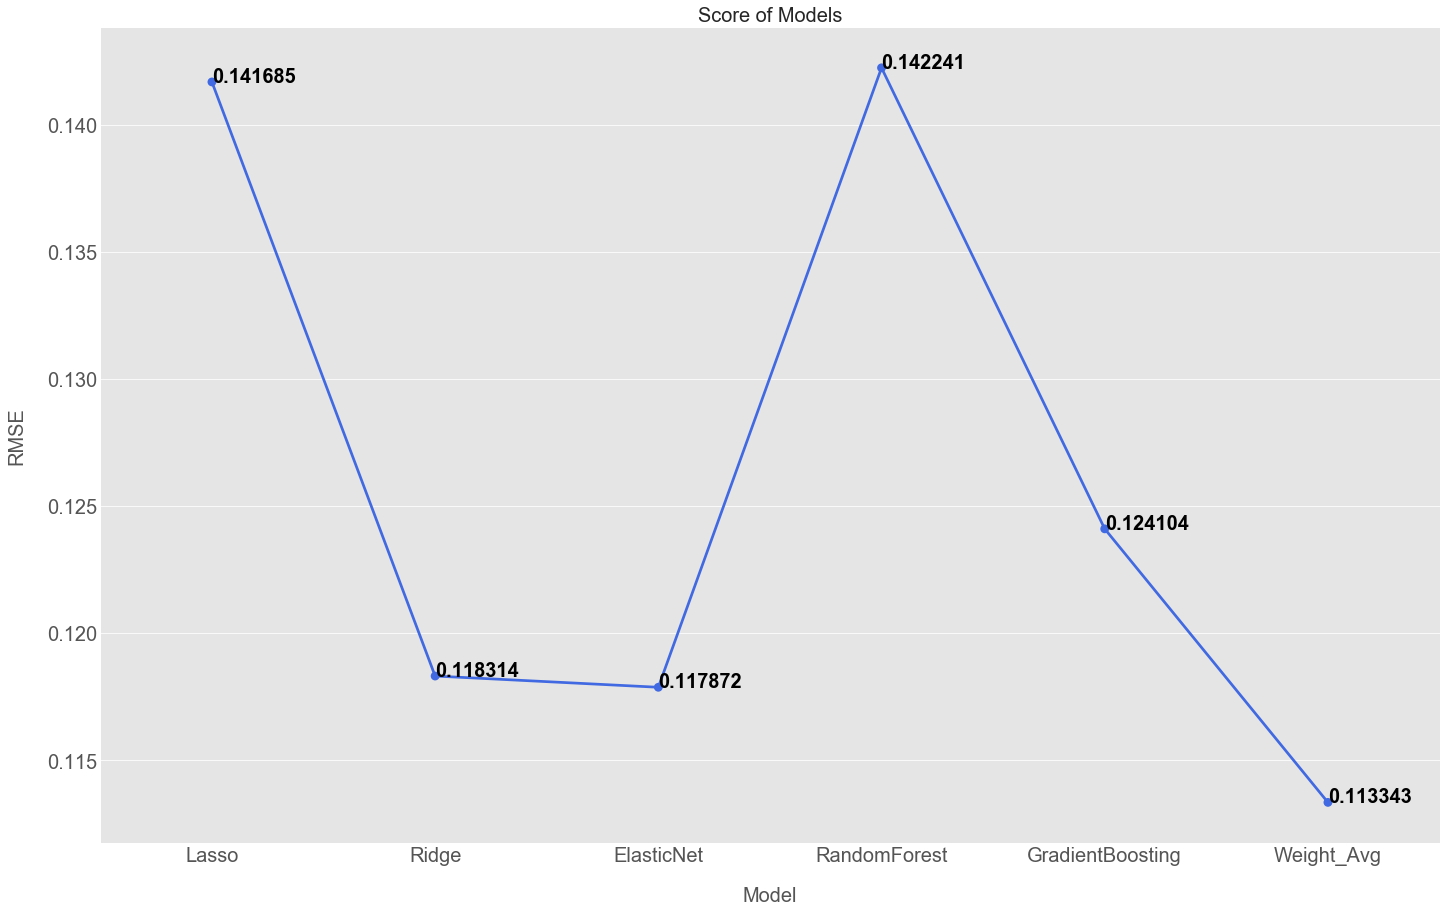

In [49]:
# Summary
plt.style.use('ggplot')
fig = plt.figure(figsize=(24, 15))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score in scores.values()], markers=['o'],linestyles=['-'],color = 'royalblue')
for i, score in enumerate(scores.values()):
    ax.text(i, score , '{:.6f}'.format(score), horizontalalignment='left', size=20, color='black', weight='semibold')

plt.ylabel('RMSE', size=20, labelpad=20.5)
plt.xlabel('Model', size=20, labelpad=20.5)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.title('Score of Models', size=20)

plt.savefig('C:\\Users\\zjh41\\Desktop\\stat 654\\final project\\Summary.png')
plt.show()

# Speed of the weightavergae( Which means we need run five base models in it)

In [50]:
%timeit -o rmse_cv(weight_avg,X,y)

15.8 s ± 55.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 15.8 s ± 55.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

# Robustness Testing
## For those potentially noisy predictors we try to add random normal noise to them, then we test the robustness of our models.

In [51]:
df_train0.head()

,2ndFlrSF,BedroomAbvGr,BsmtCond,BsmtFinSF1,BsmtFullBath,BsmtQual,BsmtUnfSF,Electrical,ExterCond,Exterior1st,Fireplaces,FullBath,Functional,GarageArea,GarageCond,GrLivArea,HalfBath,HeatingQC,LotArea,LotConfig,LotFrontage,LotShape,MSSubClass,MasVnrArea,MoSold,OpenPorchSF,OverallCond,OverallQual,SalePrice,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_0,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,CentralAir_0,CentralAir_1,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition2_0,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,Heating_0,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,LandContour_0,LandContour_1,LandContour_2,LandContour_3,LandSlope_0,LandSlope_1,LandSlope_2,MSZoning_0,MSZoning_1,MSZoning_3,MSZoning_4,MSZoning_5,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,MasVnrType_4,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,PavedDrive_0,PavedDrive_1,PavedDrive_2,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_7,SaleType_8,SaleType_9,Street_0,Street_1,Utilities_0,Utilities_2,Season_0.847447311916788,Season_1.5195625838365119,Season_2.098304160099799,Season_2.61624077727297
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.485038,2.827514,6.155929,15.210463,0.423152,5.193121,20.411592,5,0.957254,13,0.000000,1.747591,7,210.608298,9.7134,11.744803,0.350509,16.306530,32.513944,4,17.692315,3,2.656025,2.955527,1.691374,4.217865,2.243857,4.946846,12.247694,288.113743,0.000000,3.636020e+71,4.241725e+131,0.094455,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0
2,0.000000,2.827514,6.155929,16.721867,0.000000,5.193121,28.265136,5,0.957254,8,0.606718,1.747591,7,182.432283,9.7134,11.045523,0.000000,16.306530,33.658505,2,20.127676,3,2.187531,0.000000,3.721754,0.000000,2.901644,4.354046,12.109011,394.529889,4.556907,2.694972e+71,2.453779e+131,0.094455,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
3,4.490800,2.827514,6.155929,13.612096,0.423152,5.193121,34.957584,5,0.957254,13,0.606718,1.747591,7,229.341098,9.7134,11.846910,0.350509,16.306530,35.131172,4,18.196760,0,2.656025,2.902713,6.040985,3.836458,2.243857,4.946846,12.317167,305

In [52]:
noise_pred = ['LotFrontage','BsmtFullBath','BedroomAbvGr','WoodDeckSF']

In [53]:
def random_noise(df,col):
    df.reset_index(drop = True, inplace=True)
    for ele in col:
        for row in range(1,df.shape[0]):
          df[ele][row] = df[ele][row]+ np.random.randn(1)
        
random_noise(df_train0,noise_pred)

In [54]:
X = df_train0.drop('SalePrice', axis=1)
y = df_train0['SalePrice']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [55]:
score = rmse_cv(weight_avg,X,y)
print('New RMSE is', score.mean())

New RMSE is 0.11370076575764773
